In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

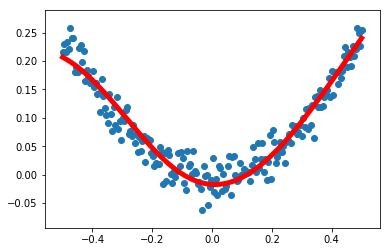

In [3]:
# 使用numpy 来生成两百个随机点
x_data = np.linspace(-0.5, 0.5, 200)[:,np.newaxis] # 在（-0.5， 0.5）之间产生均匀分布的两百个点, 再增加一个维度（200行1列）
# 生成一些随机值，形状与x_data相同
noise = np.random.normal(0,0.02,x_data.shape) 
y_data = np.square(x_data) + noise

# 定义两个placeholder
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

# 定义神经网络的中间层
Weights_L1 = tf.Variable(tf.random_normal([1,10]))
biases_L1 = tf.Variable(tf.zeros([1,10]))
Wx_plus_b_L1 = tf.matmul(x,Weights_L1) + biases_L1
L1 = tf.nn.tanh(Wx_plus_b_L1)

# 定义输出层
Weights_L2 = tf.Variable(tf.random_normal([10,1]))
biases_L2 = tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2 = tf.matmul(L1,Weights_L2) + biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)

# 二次代价函数
loss = tf.reduce_mean(tf.square(y-prediction))
# 使用梯度下降法
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

# 定义会话
with tf.Session() as sess:
    # 变量初始化
    sess.run(tf.global_variables_initializer())
    # 训练模型2000次
    for _ in range(2000):
        sess.run(train_step,feed_dict={x:x_data,y:y_data})
        
    # 获得预测值
    prediction_value = sess.run(prediction,feed_dict={x:x_data})
    # 画图
    plt.figure()
    plt.scatter(x_data,y_data) # 打印样本点
    plt.plot(x_data,prediction_value,'r-',lw=5) # r-代表红色实线，lw为线的宽度
    plt.show()